In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/ech_annonces_unified_68.csv',sep=';')
df.head()

,idannonce,type_annonceur,typedebien,typedetransaction,etage,surface,surface_terrain,nb_pieces,prix_bien,prix_maison,...,REG,DEP,type_transaction,loyer_m2_median_n6,nb_log_n6,taux_rendement_n6,loyer_m2_median_n7,nb_log_n7,taux_rendement_n7,prix_m2_vente
0,immo-facile-52417007,pr,m,l,0,116,NaN,5,1250,NaN,...,44,68,location,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ag672097-382986683,pr,a,l,3,44,NaN,3,600,NaN,...,44,68,location,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ag672097-383464082,pr,a,l,1,53,NaN,2,498,NaN,...,44,68,location,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ag680864-383044166,pr,a,l,0,41,NaN,2,460,NaN,...,44,68,location,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ag672097-380998252,pr,a,l,2,74,NaN,4,695,NaN,...,44,68,location,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# create year month days column from date
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day


In [ ]:
df['INSEE_COM']

0        68159
1        68224
2        68224
3        68224
4        68224
         ...  
39434    68297
39435    68285
39436    68285
39437    68022
39438    68022
Name: INSEE_COM, Length: 39439, dtype: int64

In [11]:
df['region'].value_counts()

region
Province         39428
Ile-de-France       11
Name: count, dtype: int64

In [12]:
df['dep_code'] = df['INSEE_COM'].astype(str).str[:2]

df['dep_code'].value_counts().head(15)


dep_code
68    39412
69       13
75       11
86        1
60        1
14        1
Name: count, dtype: int64

In [ ]:
## Haut-Rhin department code is 68

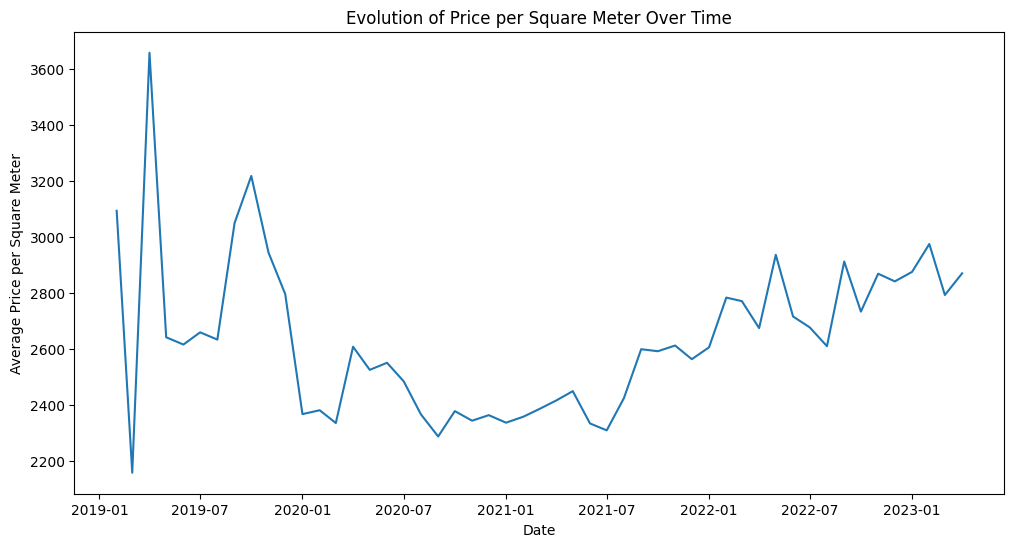

In [ ]:
# visualize the evolution the price over the years
df_evolution = df.groupby('date')['prix_m2_vente'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=df_evolution, x='date', y='prix_m2_vente')
plt.title('Evolution of Price per Square Meter Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price per Square Meter')
plt.show()
#  


In [ ]:
# evolution the price over the years
df_evolution = df.groupby('date')['prix_m2_vente'].mean().reset_index()